# Week 7 Lab: Linear Regression

At this point in the course we can import a data set, gain a rudimentary understanding of its features through summary statistics and visualisation, we can tackle noise and missing values and can combine/separate datasets which can also undergo dimensionality reduction. In short, our data is in a good place ready to be mined for insightful and meaningful information. The next problem is to decide what information we want and what algorithm we should use. We will discuss this in more detail in the lectures, but a useful 'cheat-sheet' can be found here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. While not perfect, it should help us to decide whether we want to use classification, regression or clustering. We will see all three of these in this course and in the lectures will discuss classification and clustering in detail. For this lab, we will focus on regression.

To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

## 7.1 The Task

We are going to explore linear regression by working on a problem of predicting median house value for each district in California. This dataset can be imported from sklearn.

Before we import the data, recall that we can roughly divide machine learning tasks into supervised and unsupervised learning. The former is data which has a label, whereas the latter does not. For example, suppose we have a dataset of loan applicants and we want to decide Yes/No whether to grant a loan, or perhaps we have a dataset of species attributes and want to decide what species a given animal is based upon these attributes. In both these cases, we have labels (Yes/No, $[Species_1, Species_2,\ldots]$) which are discrete and countable. Consequently, these are suitable for classification which will be the topic of this week's lectures and next week's lab. For this lab, we instead want to consider the case where the labels are continuous values, such as the price of a house. This is why the aforementioned dataset lends itself nicely to a regression algorithm. In particular, we will look at linear regression. There are other regression algorithms of course, such as multiple linear regression and polynomial regression.

## 7.2 The Data

Our data contains the following columns:

- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude

The target variable will be the median house value for California districts, expressed in hundreds of thousands of US dollars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)
cali = housing.data

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
cali.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
cali.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Now, let's look at the target variables. These contain the median house value for each district.

In [7]:
cali_targ = housing.target

cali_targ.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In conclusion, we note the dataset contains 20,640 samples and 8 features. All features are numerical and are encoded as floating numbers. There are no missing values.

## 7.3 Visualising the Data

First we create some plots to get a feel for the data.

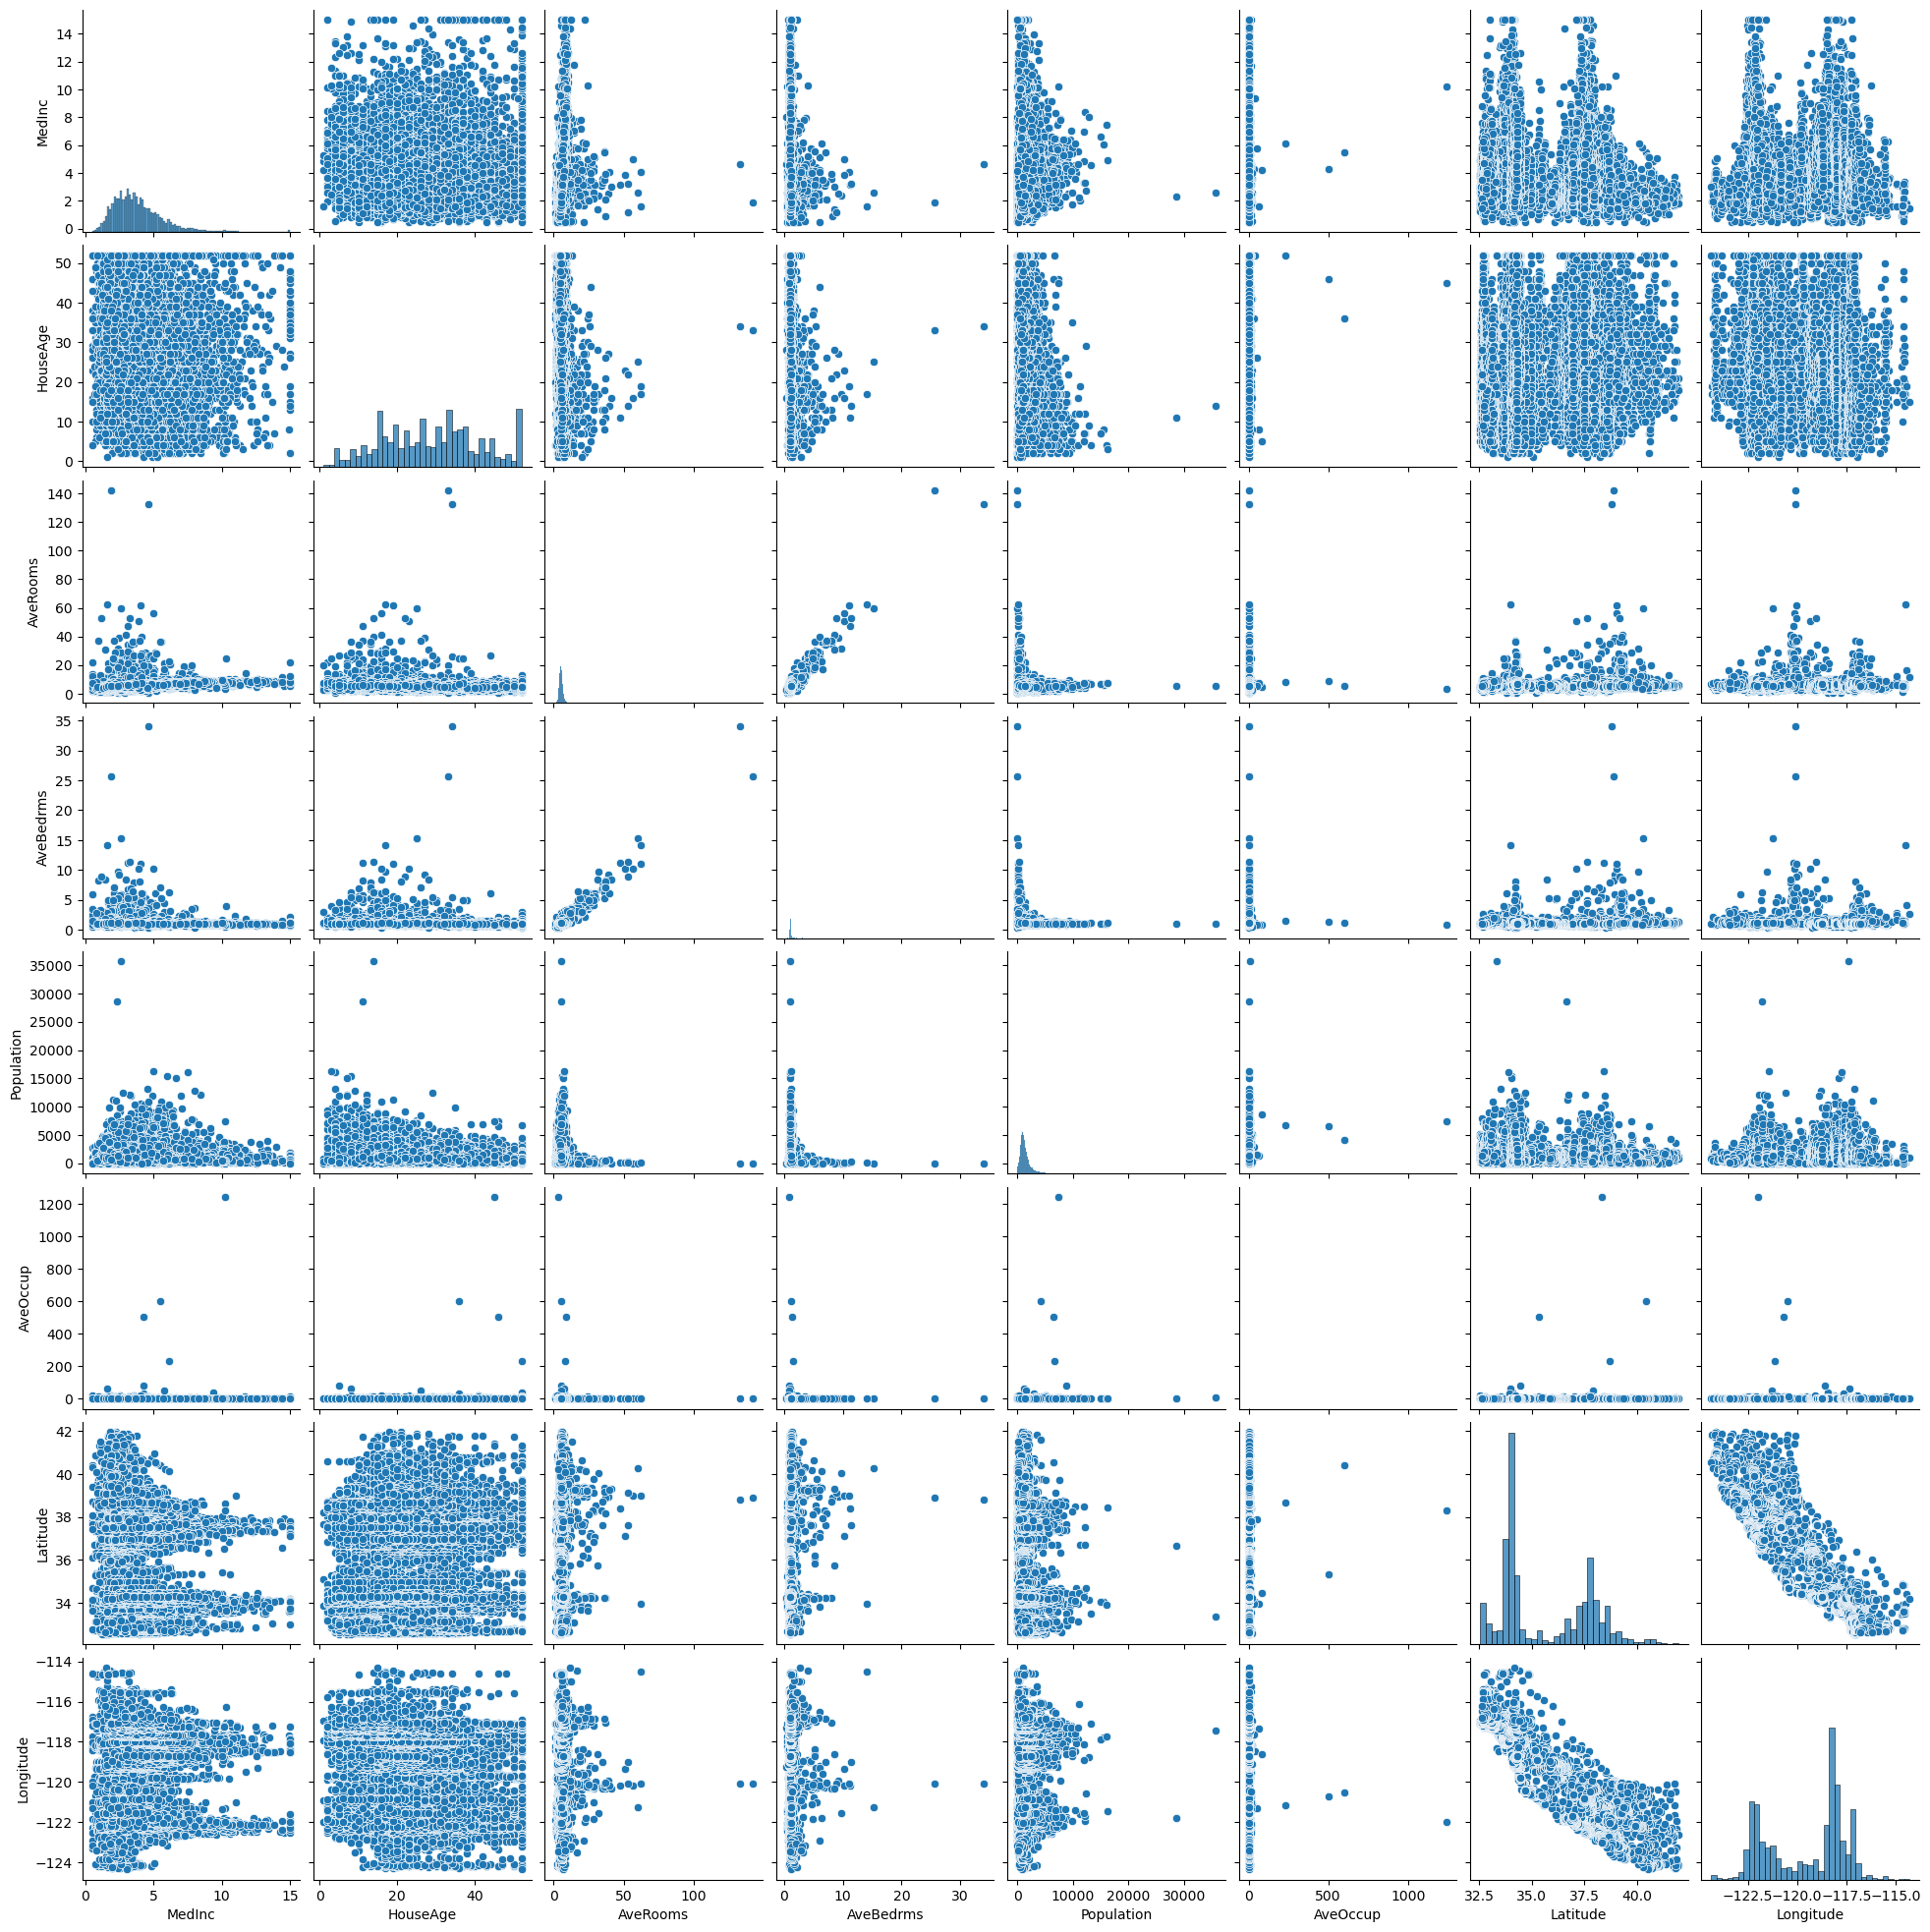

In [8]:
sns.pairplot(cali)

This looks excessive but we can obtain some ideas. It seems longitude and latitude are muddying the waters a bit for now. It also looks like some features have extreme values (outliers?). Before saying more, let's focus in on some features.

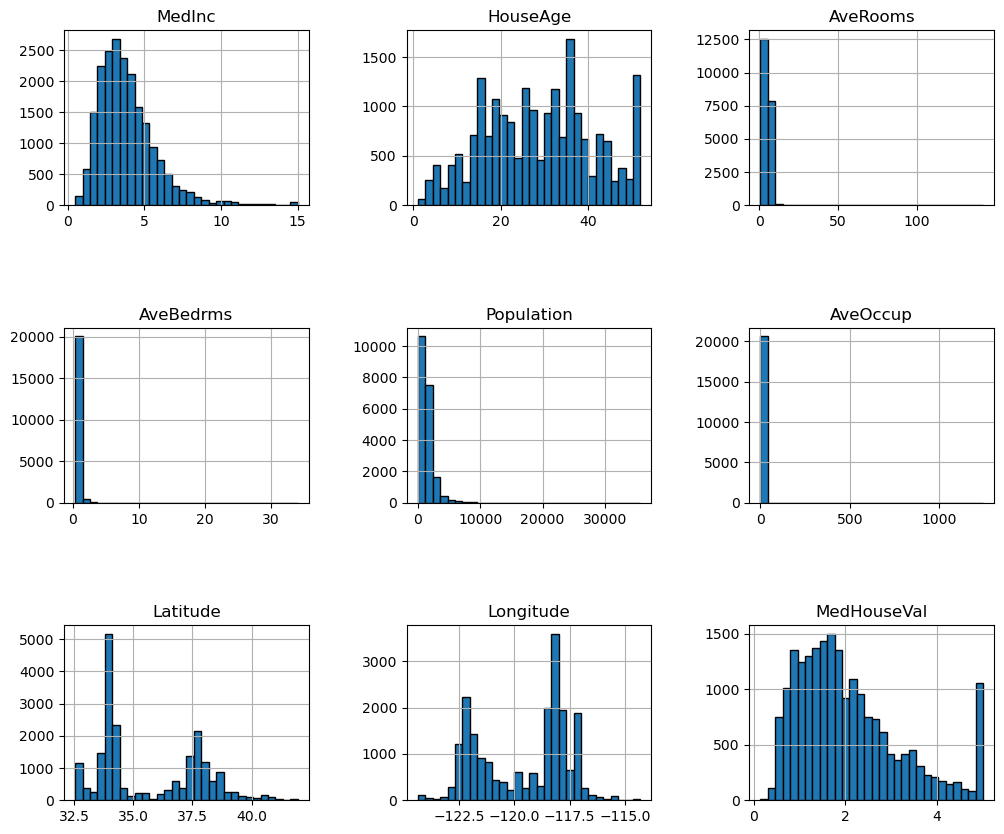

In [9]:
cali_frame = housing.frame    # Rather than look at the data and target variables separately, look at cali_frame

cali_frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

We first focus on features for which their distributions would be more or less expected. The median income is a distribution with a long tail which means that salary is more or less normally distributed but there are some people getting a high salary (nothing strange here).

Moving on, the average house age distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. This means that there are very high and few values (perhaps they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

In [10]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
cali_frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


When comparing the max and 75% values we can see a huge difference for each feature. This confirms the intuition that there are a couple of extreme values.

Thus far, we have discarded the longitude and latitude that carry geographical information. However, we would expect the combination of these features would help us to decide if there are locations associated with high-valued houses. To explore this, we make a scatter plot where the x- and y-axis are longitude and latitude, and the circle size and color will be linked with the house value in the district.

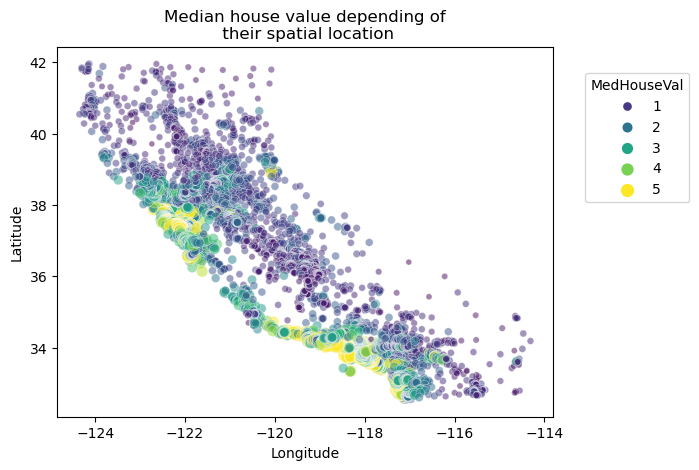

In [11]:
sns.scatterplot(
    data=cali_frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

It is interesting to note that these datapoints show a graphical representation of the state of California. As might be expected, for the most part, high-valued houses are located on the coast.

We can do a random subsampling to have fewer data points to plot but that will still allow us to see these specificities.

In [12]:
rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(cali_frame.shape[0]), size=500, replace=False
)

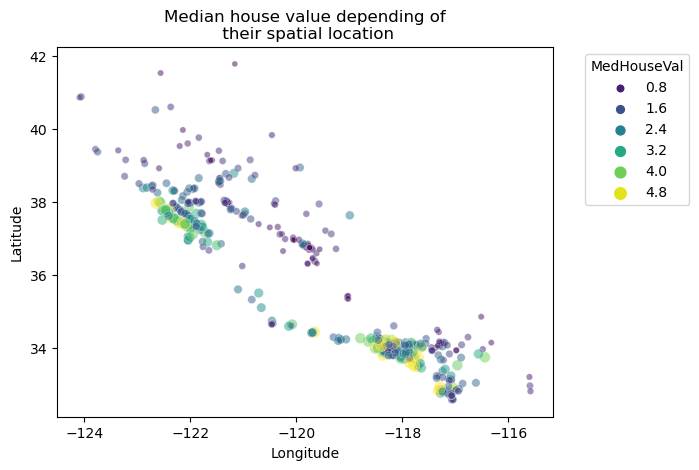

In [13]:
sns.scatterplot(
    data=cali_frame.iloc[indices],
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

Let's once again create a pairplot, but this time we will drop the longitude and latitude. We will quantise the target such that we can create proper histograms. We will also look at correlation.

In [14]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = cali_frame.iloc[indices].drop(columns=columns_drop)

# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

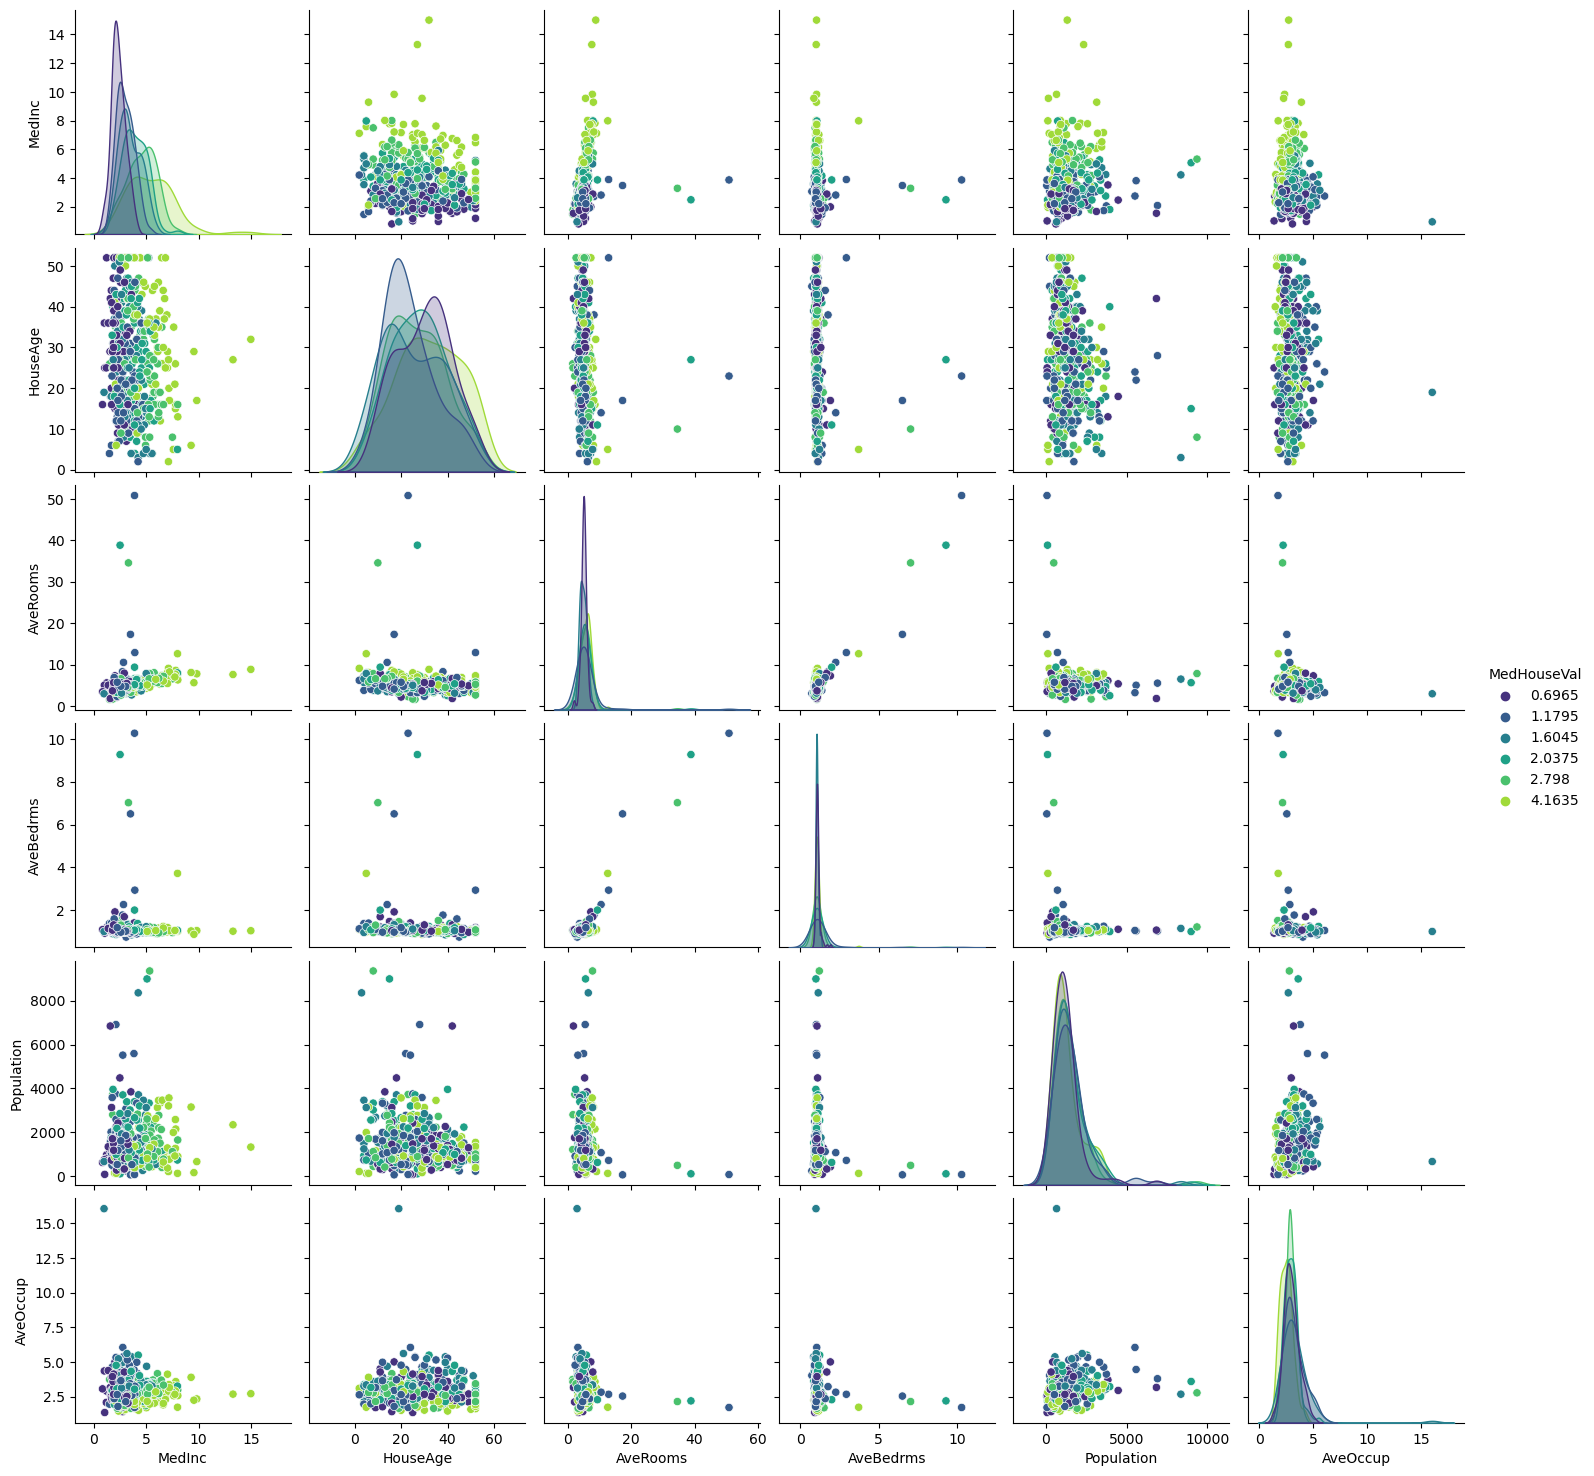

In [15]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

Based on the above we can see that the median income is helpful in distinguishing high-valued from low-valued houses. We have also seen that longitude and latitude are useful. Thus, when creating a predictive model, we might expect the longitude, latitude, and the median income to be useful features to help at predicting the median house values.

Moving on to setting up our model, we will see two approaches. The first will be similar to that outlined in the other Week 7 Lab notebook, while the latter will use cross validation and the $R^2$ score. We will not focus too much on this latter approach for now as this will all be discussed in the coming weeks.

## 7.4 Train a Linear Regression Model

Recall, we first need to split our data into a training set and a test set. More information on this can be found in the other Week 7 Lab or the main lecture notes.

In [16]:
X = cali
y = cali_targ

In [17]:
# Train/Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

__Exercise:__ Change the test size and explore the effects.

In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

## 7.5 Model Evaluation

We now have our model and next want to understand how 'good' the model actually is. We first want to check out the coefficients before interpreting them

In [20]:
# print the intercept
print(lm.intercept_)

-36.415355076464834


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,0.435943
HouseAge,0.009662
AveRooms,-0.107191
AveBedrms,0.604821
Population,-0.000004
AveOccup,-0.004109
Latitude,-0.415464
Longitude,-0.428700


Now to interpret the coefficients:

- Holding all other features fixed, a 1 unit increase in _MedInc_ is associated with an _increase_ of \$0.44.
- Holding all other features fixed, a 1 unit increase in _Latitude_ is associated with an _decrease_ of \$0.42.
- Holding all other features fixed, a 1 unit increase in _Longitude_ is associated with an _decrease_ of \$0.43.

_AveBedrms_ may also be worth looking at.

## 7.6 Predictions from our Model

Finally, let's grab some predictions from the test set and see how it performs.

In [22]:
predictions = lm.predict(X_test)

In [23]:
y_test.head()

16086    4.06200
8816     5.00001
7175     1.22900
16714    2.09100
14491    5.00001
Name: MedHouseVal, dtype: float64

In [24]:
predictions

array([3.14285047, 5.47805354, 1.68815171, ..., 2.7666517 , 2.77869323,
       3.75003416])

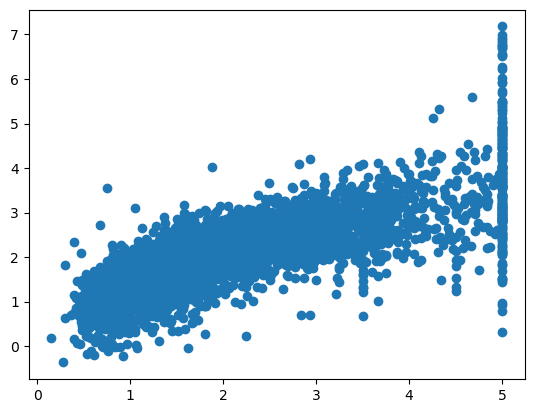

In [25]:
plt.scatter(y_test,predictions)

Looks okay (definitely not great) but there are some definite outliers.

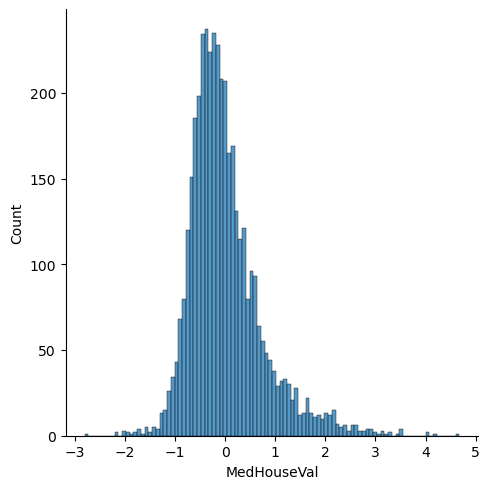

In [26]:
# Visualise the residuals which are y_test - predictions
sns.displot((y_test-predictions),bins=100);

Okay, so most of the time it looks as though the error is distributed about 0 (that's good). Although there are some values which are very wrong. For a linear regression model, this is probably not going to get much better.

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5379335579317646
MSE: 0.544677599684471
RMSE: 0.7380227636627958


In [28]:
# Since we are going to use R^2 next, let's work it out here also
print('R2:', metrics.explained_variance_score(y_test, predictions))

R2: 0.597134504976481


## 7.7 Alternative Model

This time we will utilise cross-validation and the $R^2$ score. This takes a value from 0 to 1 where a 0 indicates that the response variable cannot be explained by the predictor variable at all, while a value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable. Roughly, the larger the $R^2$ value, the more precisely the predictor variables are able to predict the value of the response variable.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    cali,
    cali_targ,
    return_estimator=True,
    n_jobs=2,
)

In [30]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.062


This isn't a great score. Perhaps with some feature engineering this could be improved, but in all likelihood linear regression is probably not going to achieve much better results for this kind of data set. Instead, perhaps other regression algorithms might be more suitable.

In [31]:
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=housing.feature_names,
)

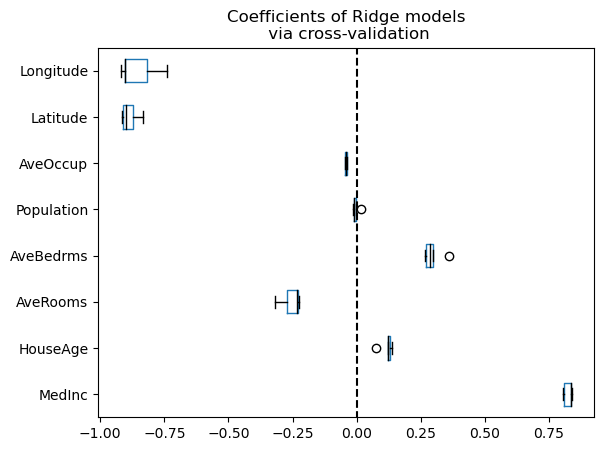

In [32]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models\n via cross-validation")

It seems that the three features that we earlier spotted are found to be important by this model.

## 7.8 Exercise Problem

Suppose you just got some contract work with an Ecommerce company based in New York that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out. On Canvas, you should see some fake customer data titled 'Ecommerce Customers'. It has customer information, such as Email, Address, and their colour Avatar. It also has numerical value columns:

* Avg. Session Length: Average session of an in-store style advice sessions.
* Time on App: Average time spent on the app in minutes.
* Time on Website: Average time spent on the website in minutes.
* Length of Membership: How many years the customer has been a member. 

Load the dataset and tackle the following:

1. Obtain basic information on the dataset so you know things like how many features there are, how many customers you have data for etc.
2. Use seaborn to create a jointplot to compare the _Time on Website_ and _Yearly Amount Spent_ columns. Decide whether the correlation makes sense. Then do the same with _Time on App_ instead.
3. Use jointplot to create a 2D hex bin plot comparing _Time on App_ and _Length of Membership_.
4. Use pairplot to explore the relationships across the entire dataset. What looks to be the most correlated feature with _Yearly Amount Spent_?
5. Use seaborn to create a linear model plot of _Yearly Amount Spent_ against the answer to the last question.
6. Split the data into training and testing sets with a variable $y$ equal to the _Yearly Amount Spent_ column. When splitting your dataset, use `test_size=0.3` and `random_state=101` as parameters.
7. Import `LinearRegression` and create an instance of this. Train/fit this instance on the training data and print out the coefficients of the model.
8. Use the `.predict()` method to predict off the test set. Then create a scatterplot of the real test values versus the predicted values.
9. Calculate the MAE, MSE and RMSE for your predictions.
10. Check everything is okay with our data by exploring the residuals. Recall, the residuals for an observation is the difference between the observation and the fitted line. Plot a histogram of the residuals and make sure it looks normally distributed.
11. Decide whether the company should focus most effort on the mobile app or website development. Alternatively, perhaps it does not matter and the answer to part (4) is what is important. If that is the case, justify it.

## 7.9 Summary

We should now be able to perform a simple linear regression on a dataset and understand the difference between regression and classification tasks.